In [54]:
import numpy as np
from gensim.models import word2vec
import matplotlib.pyplot as plt
%matplotlib inline

## 词向量可视化

In [55]:
model = word2vec.Word2Vec.load('../cache/w2v_cbow')
# model = word2vec.Word2Vec.load('../cache/w2v_skip')
# model1 = word2vec.KeyedVectors.load_word2vec_format("../cache/w2v_cbow_format", binary=True)

In [56]:
count = 10000
word_vectors_matrix = np.ndarray(shape=(count, 300), dtype='float32')
word_list = []
i = 0
for word in model.wv.vocab:
    word_vectors_matrix[i] = model[word]
    word_list.append(word)
    i += 1
    if i == count:
        break
print("word_vectors_matrix shape is: ", word_vectors_matrix.shape)

D:\ProgramAPP\python\anaconda\lib\site-packages\ipykernel\__main__.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


word_vectors_matrix shape is:  (10000, 300)


In [57]:
%time
import sklearn.manifold as ts
tsne = ts.TSNE(n_components=2, random_state=0)
word_vectors_matrix_2d = tsne.fit_transform(word_vectors_matrix)
print("word_vectors_matrix_2d shape is: ", word_vectors_matrix_2d.shape)

Wall time: 0 ns
word_vectors_matrix_2d shape is:  (10000, 2)


In [58]:
import pandas as pd
points = pd.DataFrame([(word, coords[0], coords[1]) for word, coords in [(word, word_vectors_matrix_2d[word_list.index(word)]) for word in word_list] ], columns=["word", "x", "y"])
print("Points DataFrame built")
print(points.head(10))

Points DataFrame built
      word          x          y
0        　  35.968571 -27.188988
1       宁夏  51.375587   4.060314
2       食品  47.411263  -3.912474
3  药品监督管理局 -59.579361  -4.300385
4     2017  14.302612  68.175690
5        年 -10.886168  67.247650
6     食品安全 -18.728111  -4.114270
7       监督  35.426834 -26.985252
8       抽检  36.181385 -28.582870
9        （  20.626284  59.610710


In [59]:
#DataFrame来绘制我们的单词向量
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体：解决plot不能显示中文问题,否则会显示成方块
mpl.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题

In [66]:
def plot_region(x_bounds, y_bounds):
    slices = points[
        (x_bounds[0] <= points.x) &
        (points.x <= x_bounds[1]) &
        (y_bounds[0] <= points.y) &
        (points.y <= y_bounds[1])
        ]
    ax = slices.plot.scatter("x", "y", s=10, figsize=(15, 12))
    for  i, point in slices.iterrows():
        ax.text(point.x + 0.05, point.y + 0.05, point.word, fontsize=18) # text可以将文本绘制在图表指定坐标(x,y)

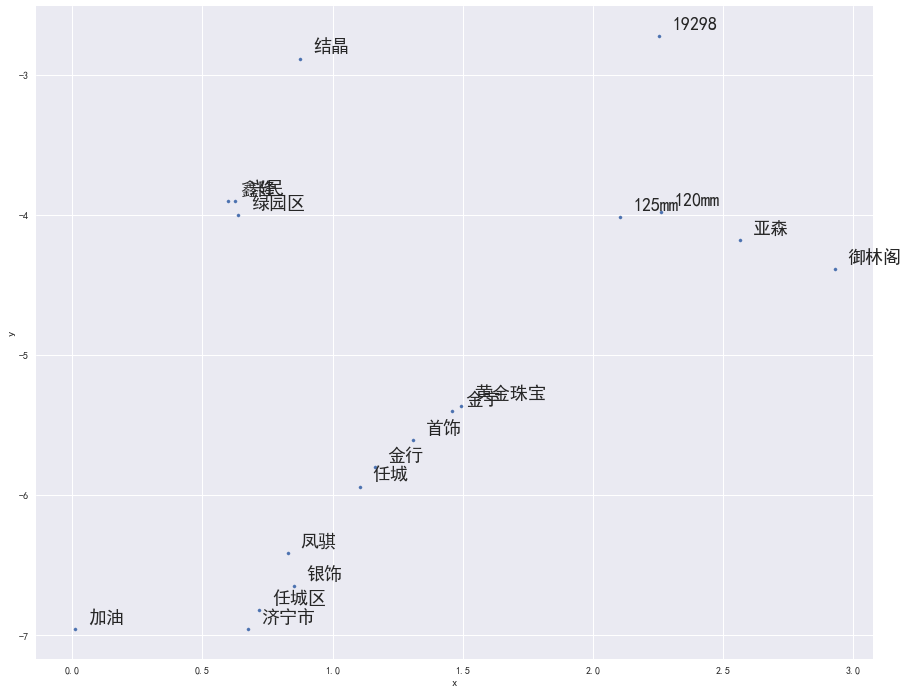

In [67]:
plot_region(x_bounds=(0, 3), y_bounds=(-7.5, -2.5))
plt.show()

## 好看图1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

([<matplotlib.axis.XTick at 0x1e37f6e56d8>,
 <a list of 6 Text xticklabel objects>)

(array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16.]),
 <a list of 9 Text yticklabel objects>)

(0.9, 6.1)

(1.5, 16)

[None, None, None, None, None, None]

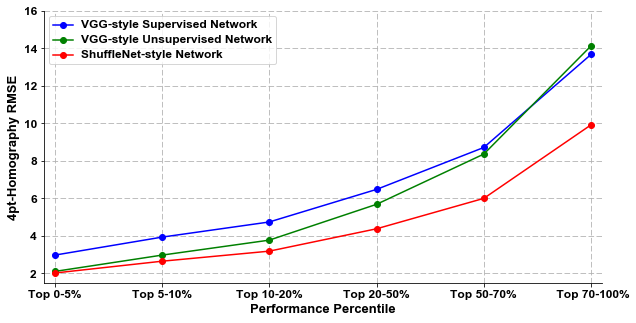

In [4]:
plt.rcParams['font.sans-serif'] = ['Arial']  # 如果要显示中文字体,则在此处设为：SimHei
plt.rcParams['axes.unicode_minus'] = False  # 显示负号
x = np.array([1, 2, 3, 4, 5, 6])
VGG_supervised = np.array([2.9749694, 3.9357018, 4.7440844, 6.482254, 8.720203, 13.687582])
VGG_unsupervised = np.array([2.1044724, 2.9757383, 3.7754183, 5.686206, 8.367847, 14.144531])
ourNetwork = np.array([2.0205495, 2.6509762, 3.1876223, 4.380781, 6.004548, 9.9298])
# label在图示(legend)中显示。若为数学公式,则最好在字符串前后添加"$"符号
# color：b:blue、g:green、r:red、c:cyan、m:magenta、y:yellow、k:black、w:white、、、
# 线型：-  --   -.  :    ,
# marker：.  ,   o   v    <    *    +    1
plt.figure(figsize=(10, 5))
plt.grid(linestyle="--")  # 设置背景网格线为虚线
ax = plt.gca()
ax.spines['top'].set_visible(False)  # 去掉上边框
ax.spines['right'].set_visible(False)  # 去掉右边框

plt.plot(x, VGG_supervised, marker='o', color="blue", label="VGG-style Supervised Network", linewidth=1.5)
plt.plot(x, VGG_unsupervised, marker='o', color="green", label="VGG-style Unsupervised Network", linewidth=1.5)
plt.plot(x, ourNetwork, marker='o', color="red", label="ShuffleNet-style Network", linewidth=1.5)

group_labels = ['Top 0-5%', 'Top 5-10%', 'Top 10-20%', 'Top 20-50%', 'Top 50-70%', ' Top 70-100%']  # x轴刻度的标识
plt.xticks(x, group_labels, fontsize=12, fontweight='bold')  # 默认字体大小为10
plt.yticks(fontsize=12, fontweight='bold')
# plt.title("example", fontsize=12, fontweight='bold')  # 默认字体大小为12
plt.xlabel("Performance Percentile", fontsize=13, fontweight='bold')
plt.ylabel("4pt-Homography RMSE", fontsize=13, fontweight='bold')
plt.xlim(0.9, 6.1)  # 设置x轴的范围
plt.ylim(1.5, 16)
# plt.legend()          #显示各曲线的图例
plt.legend(loc=0, numpoints=1)
leg = plt.gca().get_legend()
ltext = leg.get_texts()
plt.setp(ltext, fontsize=12, fontweight='bold')  # 设置图例字体的大小和粗细

# plt.savefig('./filename.svg', format='svg')  # 建议保存为svg格式,再用inkscape转为矢量图emf后插入word中
plt.show()